# MLF_GP1_CreditScore

In [8]:
import pandas as pd
import numpy as np
import sklearn
import sys
import matplotlib.pyplot as plt
import scipy
import pylab
import scipy.stats as stats
from pandas import DataFrame
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from mlxtend.classifier import EnsembleVoteClassifier

# Part1: Moody Rating

## EDA

In [10]:
df=pd.read_csv("/Users/jialingzhu/Downloads/UIUC_Course/Machine Learning/Middle Term Project//MLF_GP1_CreditScore.csv")
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [9]:
xList = []
labels = []
for line in df:
    #split on comma
    row = df[line]
    xList.append(row)
sys.stdout.write("Number of Rows = " + str(len(xList[1])) + '\n')
sys.stdout.write("Number of Columns = " + str(len(xList)))
df.describe()

Number of Rows = 1700
Number of Columns = 28

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


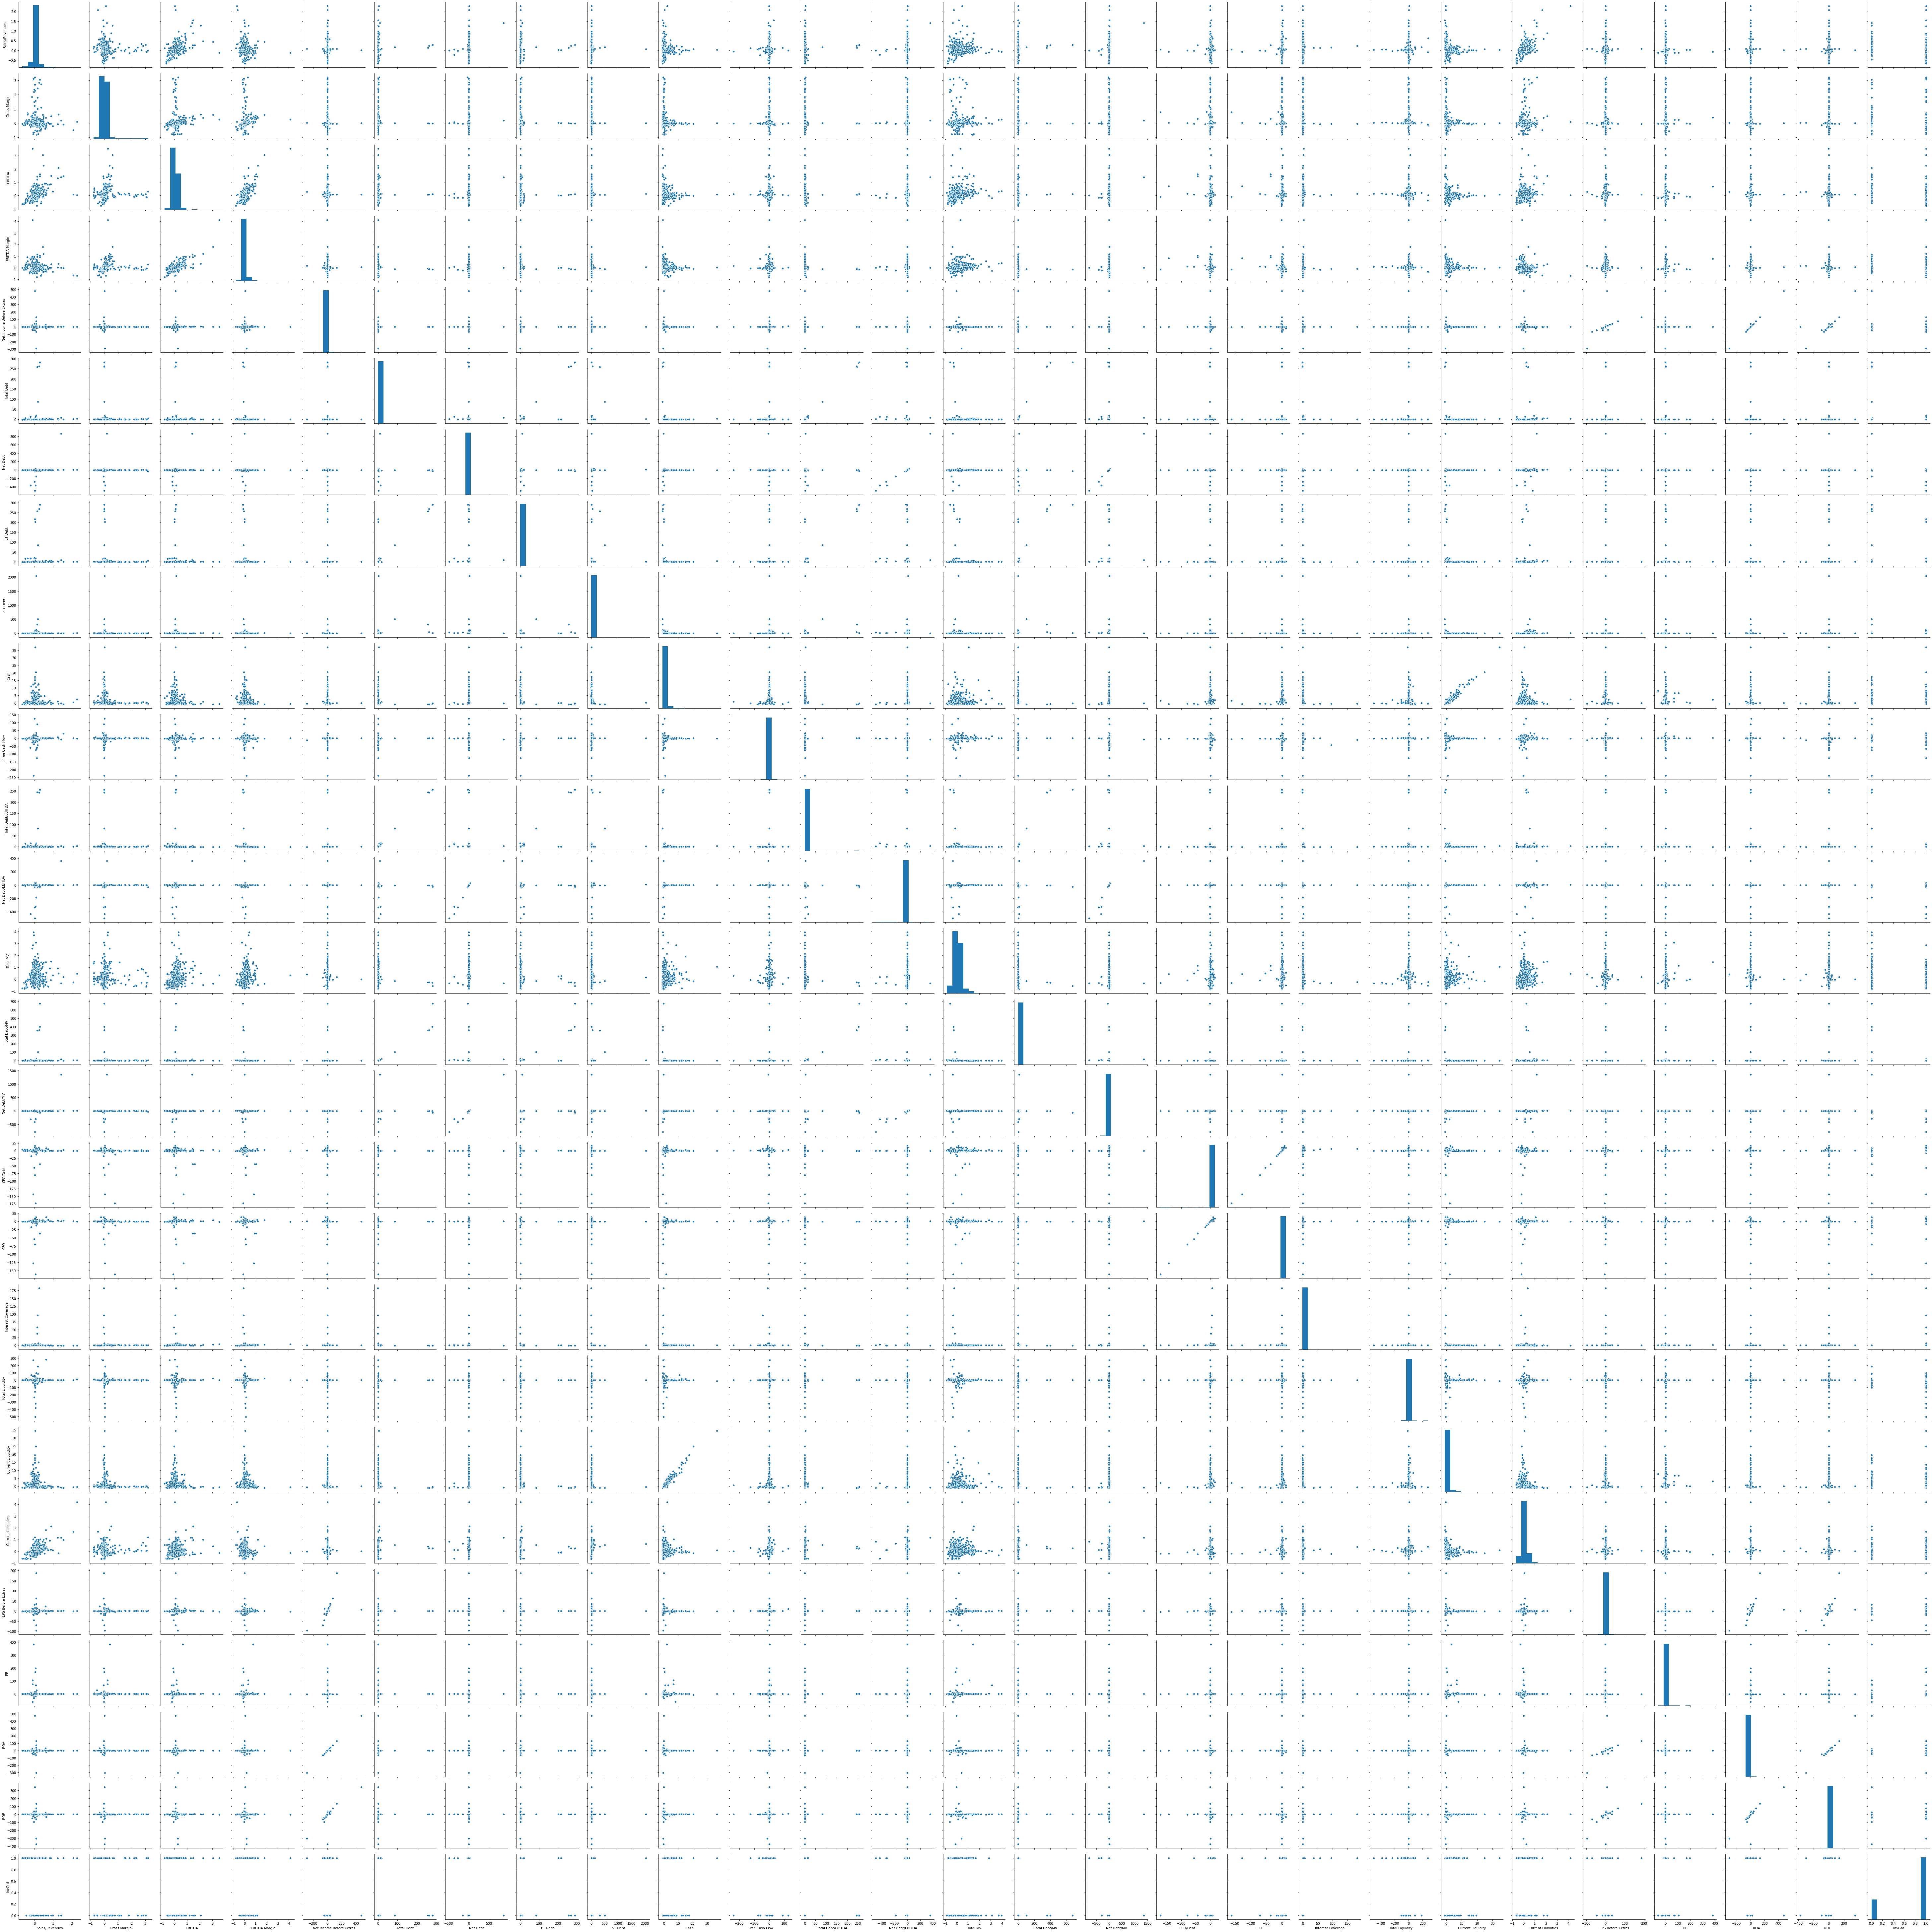

In [6]:
X=df.values[:,0:28]
y=df['Rating'].values
sns.pairplot(df, height=3)
plt.tight_layout()
plt.show()

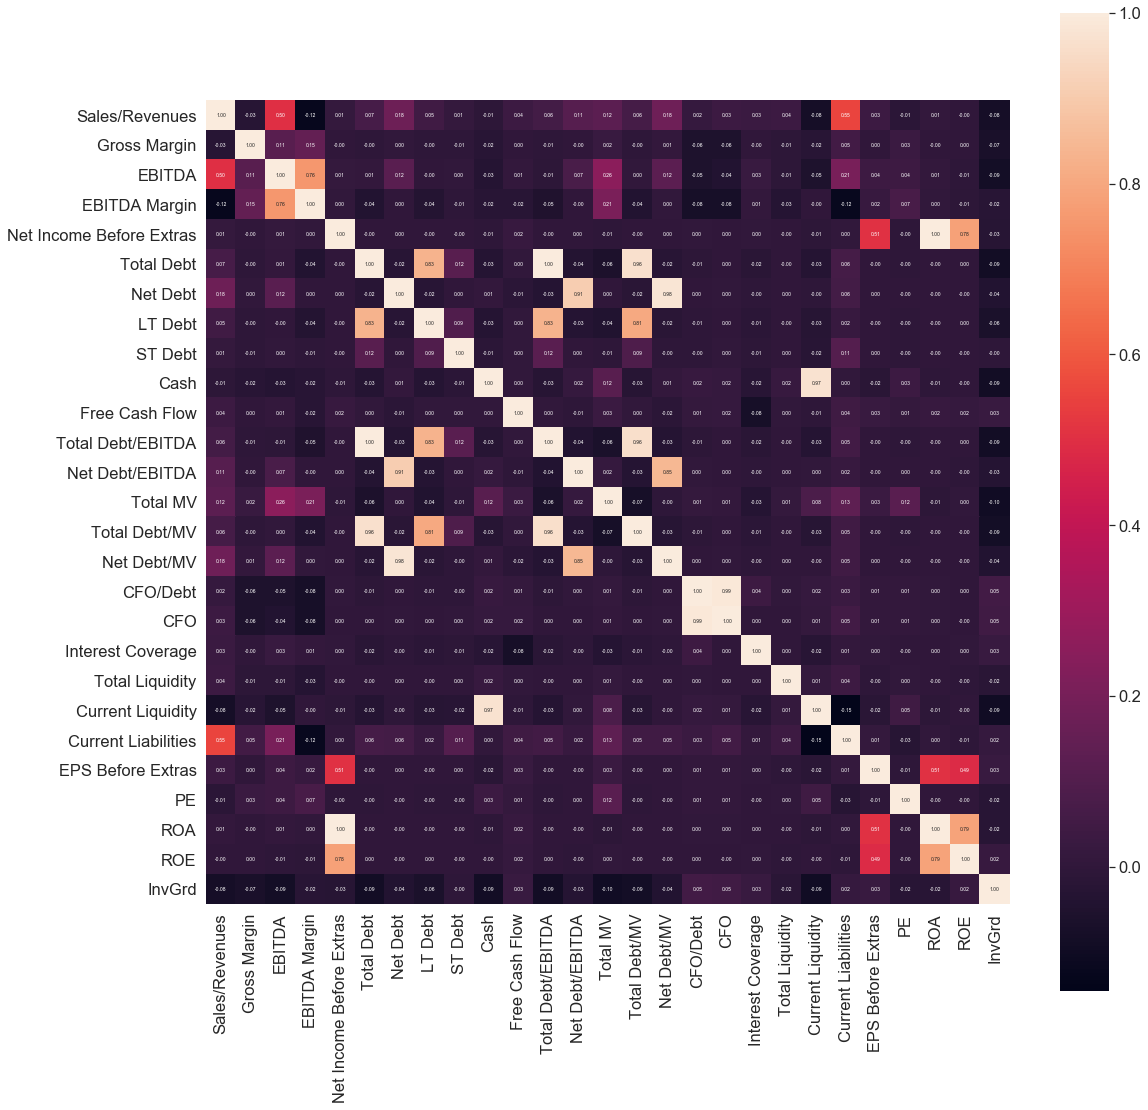

In [7]:
gf=df.drop('Rating', axis = 1)
cm = np.corrcoef(gf.values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 5},
            yticklabels=gf.columns,
            xticklabels=gf.columns, ax=ax)
plt.savefig('heatmap.png', dpi=300)
plt.show()

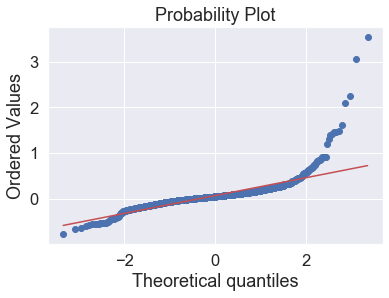

In [8]:
xList = []
labels = []
for line in df:

    row = df[line]
    xList.append(row)
nrow = len(xList[1])
ncol = len(xList)
type = [0]*3
colCounts = []

col = 2
colData = []
for row in xList[2]:
    colData.append(float(row))
scipy.stats.probplot(colData, dist="norm", plot=pylab)
pylab.show()

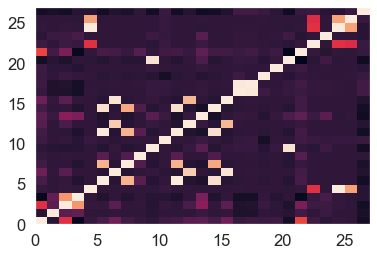

In [9]:
corMat = DataFrame(df.corr())
plot.pcolor(corMat)
plot.show()

## 2) Preprocessing

In [11]:
##Investment Grade
##PCA
df=pd.read_csv("/Users/jialingzhu/Downloads/UIUC_Course/Machine Learning/Middle Term Project//MLF_GP1_CreditScore.csv")
X, y = df.iloc[:, 0:26], df.iloc[:, -2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 666) 

In [12]:
sc = StandardScaler()
pca = PCA()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
cov_mat = np.cov(X_test_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[6.29268880e+00 5.36789491e+00 3.70430323e+00 1.85033399e+00
 1.62743280e+00 1.21225699e+00 9.72153819e-01 8.35530921e-01
 6.34886499e-01 5.80910193e-01 4.68537392e-01 4.10074896e-01
 3.57763507e-01 3.27160599e-01 2.12914116e-01 1.76582641e-02
 9.80519395e-03 8.90166511e-03 8.07741383e-03 3.93247417e-03
 3.25801197e-03 7.56637971e-04 1.80290455e-04 6.21381679e-05
 5.70426196e-05 4.01057126e-05]


# tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(0,26),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(0,26),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

## 3)Modeling and Tuning

In [13]:
##Without PCA
pca = PCA(n_components=10)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
##knn
param_grid={'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid)
knn_cv.fit(X_train_std, y_train)
print('best k')
print(format(knn_cv.best_params_))
print('Optimal accuracy score ')
print(format(knn_cv.best_score_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best k
{'n_neighbors': 1}
Optimal accuracy score 
0.7919117647058823


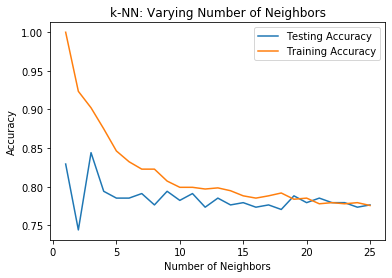

In [16]:
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    train_accuracy[i]=knn.score(X_train_std,y_train)
    test_accuracy[i]=knn.score(X_test_std,y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [37]:
##tree
param_grid={'max_depth': np.arange(1,20)}
tree=DecisionTreeClassifier()
tree_cv=GridSearchCV(tree,param_grid)
tree_cv.fit(X_train_std, y_train)
print('best depth')
print(format(tree_cv.best_params_))
print('Optimal accuracy score ')
print(format(tree_cv.best_score_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best depth
{'max_depth': 6}
Optimal accuracy score 
0.7852941176470588


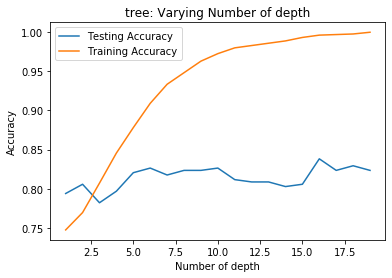

In [39]:
mx_depth = np.arange(1, 20)
train_accuracy = np.empty(len(mx_depth))
test_accuracy = np.empty(len(mx_depth))
for i,k in enumerate(mx_depth):
    tree=DecisionTreeClassifier(max_depth=k)
    tree.fit(X_train_std,y_train)
    train_accuracy[i]=tree.score(X_train_std,y_train)
    test_accuracy[i]=tree.score(X_test_std,y_test)
plt.title('tree: Varying Number of depth')
plt.plot(mx_depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(mx_depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of depth')
plt.ylabel('Accuracy')
plt.show() 

In [40]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
param_grid={'C': (1,0.1,0.01,0.001,0.0001)}
lgc_cv=GridSearchCV(lgc,param_grid)
lgc_cv.fit(X_train_std,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.0001}
Optimal accuracy score 
0.7536764705882353


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

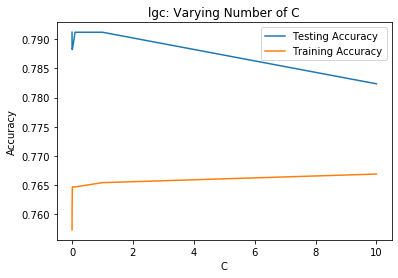

In [41]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    lgc=LogisticRegression(C=k)
    lgc.fit(X_train_std,y_train)
    train_accuracy[i]=lgc.score(X_train_std,y_train)
    test_accuracy[i]=lgc.score(X_test_std,y_test)
plt.title('lgc: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [42]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
param_grid={'C': (1,0.1,0.01,0.001,0.0001,10)}
svc_cv=GridSearchCV(lgc,param_grid)
svc_cv.fit(X_train_std,y_train)
print('best C')
print(format(svc_cv.best_params_))
print('Optimal accuracy score ')
print(format(svc_cv.best_score_))

best C
{'C': 0.0001}
Optimal accuracy score 
0.7536764705882353


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

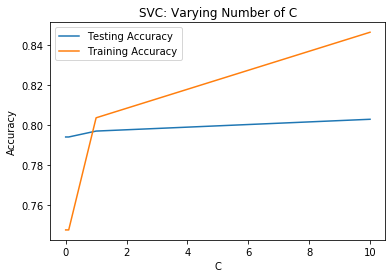

In [43]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    svc=SVC(C=k)
    svc.fit(X_train_std,y_train)
    train_accuracy[i]=svc.score(X_train_std,y_train)
    test_accuracy[i]=svc.score(X_test_std,y_test)
plt.title('SVC: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
log=LogisticRegression(C=0.0001)
tree=DecisionTreeClassifier(max_depth=6)
knn=KNeighborsClassifier(n_neighbors=1)
svc=SVC(C=0.0001)
pipe1=Pipeline([["sc", StandardScaler()],
               ['clf', log]])
pipe3=Pipeline([["sc", StandardScaler()],
               ['clf', knn]])
pipe4=Pipeline([["sc", StandardScaler()],
               ['clf', svc]])
clf_labels=["Logestic regression", "Decision tree", "KNN","SVC"]
print("10-fold cross validation:\n")
for clf, label in zip([pipe1, tree, pipe3,pipe4], clf_labels):
    scores=cross_val_score(estimator=clf,
                          X=X_train_std,
                          y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.75 (+/- 0.02) [Logestic regression]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.80 (+/- 0.03) [Decision tree]
Accuracy: 0.81 (+/- 0.03) [KNN]
Accuracy: 0.75 (+/- 0.00) [SVC]


In [26]:
from mlxtend.classifier import EnsembleVoteClassifier
eclf = EnsembleVoteClassifier(clfs=[log, tree, knn, svc], weights=[1,1,1,1])

labels = ['Logistic Regression', 'Tree', 'KNN','SVC' , 'Ensemble']
for clf, label in zip([log, tree, knn,svc, eclf], labels):

    scores = cross_val_score(clf, X_train_std, 
                            y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklea

Accuracy: 0.75 (+/- 0.02) [Logistic Regression]
Accuracy: 0.79 (+/- 0.04) [Tree]
Accuracy: 0.81 (+/- 0.02) [KNN]


E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

Accuracy: 0.75 (+/- 0.00) [SVC]


E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packa

Accuracy: 0.82 (+/- 0.02) [Ensemble]


E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### With PCA

In [45]:
##Investment Grade
##PCA
df=pd.read_csv("/Users/jialingzhu/Downloads/UIUC_Course/Machine Learning/Middle Term Project//MLF_GP1_CreditScore.csv")
X, y = df.iloc[:, 0:26], df.iloc[:, -2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 666) 

In [46]:
sc = StandardScaler()
pca = PCA()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
cov_mat = np.cov(X_test_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[6.29268880e+00 5.36789491e+00 3.70430323e+00 1.85033399e+00
 1.62743280e+00 1.21225699e+00 9.72153819e-01 8.35530921e-01
 6.34886499e-01 5.80910193e-01 4.68537392e-01 4.10074896e-01
 3.57763507e-01 3.27160599e-01 2.12914116e-01 1.76582641e-02
 9.80519395e-03 8.90166511e-03 8.07741383e-03 3.93247417e-03
 3.25801197e-03 7.56637971e-04 1.80290455e-04 6.21381679e-05
 5.70426196e-05 4.01057126e-05]


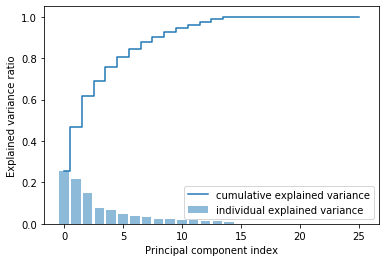

In [47]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(0,26),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(0,26),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [48]:
##With PCA
pca = PCA(n_components=10)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [49]:
##knn
param_grid={'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid)
knn_cv.fit(X_train_pca, y_train)
print('best k')
print(format(knn_cv.best_params_))
print('Optimal accuracy score ')
print(format(knn_cv.best_score_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best k
{'n_neighbors': 1}
Optimal accuracy score 
0.7669117647058824


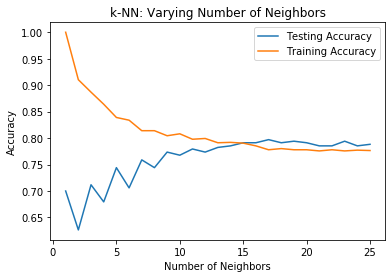

In [50]:
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    train_accuracy[i]=knn.score(X_train_pca,y_train)
    test_accuracy[i]=knn.score(X_test_pca,y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [51]:
##tree
param_grid={'max_depth': np.arange(1,20)}
tree=DecisionTreeClassifier()
tree_cv=GridSearchCV(tree,param_grid)
tree_cv.fit(X_train_pca, y_train)
print('best depth')
print(format(tree_cv.best_params_))
print('Optimal accuracy score ')
print(format(tree_cv.best_score_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best depth
{'max_depth': 5}
Optimal accuracy score 
0.7448529411764706


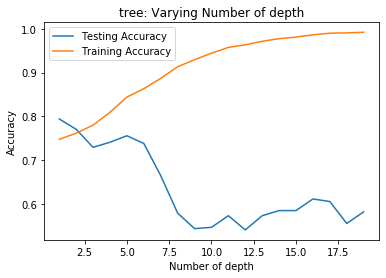

In [52]:
mx_depth = np.arange(1, 20)
train_accuracy = np.empty(len(mx_depth))
test_accuracy = np.empty(len(mx_depth))
for i,k in enumerate(mx_depth):
    tree=DecisionTreeClassifier(max_depth=k)
    tree.fit(X_train_pca,y_train)
    train_accuracy[i]=tree.score(X_train_pca,y_train)
    test_accuracy[i]=tree.score(X_test_pca,y_test)
plt.title('tree: Varying Number of depth')
plt.plot(mx_depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(mx_depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of depth')
plt.ylabel('Accuracy')
plt.show() 

In [53]:
lgc=LogisticRegression()
param_grid={'C': (1,0.1,0.01,0.001,0.0001)}
lgc_cv=GridSearchCV(lgc,param_grid)
lgc_cv.fit(X_train_pca,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.001}
Optimal accuracy score 
0.7522058823529412


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

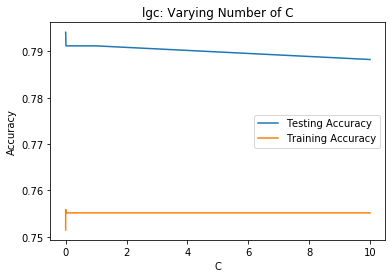

In [54]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    lgc=LogisticRegression(C=k)
    lgc.fit(X_train_pca,y_train)
    train_accuracy[i]=lgc.score(X_train_pca,y_train)
    test_accuracy[i]=lgc.score(X_test_pca,y_test)
plt.title('lgc: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [55]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
param_grid={'C': (1,0.1,0.01,0.001,0.0001,10)}
svc_cv=GridSearchCV(lgc,param_grid)
svc_cv.fit(X_train_pca,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.001}
Optimal accuracy score 
0.7522058823529412


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/

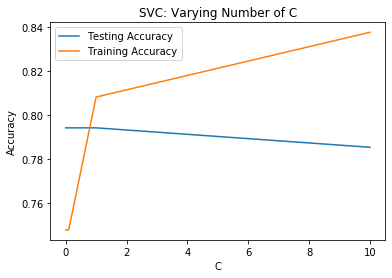

In [57]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    svc=SVC(C=k)
    svc.fit(X_train_pca,y_train)
    train_accuracy[i]=svc.score(X_train_pca,y_train)
    test_accuracy[i]=svc.score(X_test_pca,y_test)
plt.title('SVC: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [58]:

log=LogisticRegression(C=0.001)
tree=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier(n_neighbors=1)
svc=SVC(C=0.001)
pipe1=Pipeline([["sc", StandardScaler()],
               ['clf', log]])
pipe3=Pipeline([["sc", StandardScaler()],
               ['clf', knn]])
pipe4=Pipeline([["sc", StandardScaler()],
               ['clf', svc]])
clf_labels=["Logestic regression", "Decision tree", "KNN","SVC"]
print("10-fold cross validation:\n")
for clf, label in zip([pipe1, tree, pipe3,pipe4], clf_labels):
    scores=cross_val_score(estimator=clf,
                          X=X_train_pca,
                          y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.75 (+/- 0.01) [Logestic regression]
Accuracy: 0.75 (+/- 0.03) [Decision tree]
Accuracy: 0.78 (+/- 0.02) [KNN]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.75 (+/- 0.00) [SVC]


In [104]:
eclf = EnsembleVoteClassifier(clfs=[log, tree, knn, svc], weights=[1,1,1,1])

labels = ['Logistic Regression', 'Tree', 'KNN','SVC' , 'Ensemble']
for clf, label in zip([log, tree, knn,svc, eclf], labels):

    scores = cross_val_score(clf, X_train_pca, 
                            y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklea

Accuracy: 0.75 (+/- 0.01) [Logistic Regression]
Accuracy: 0.75 (+/- 0.04) [Tree]
Accuracy: 0.78 (+/- 0.02) [KNN]


E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

Accuracy: 0.75 (+/- 0.00) [SVC]


E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packa

Accuracy: 0.78 (+/- 0.02) [Ensemble]


E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packa

# Moody's score

In [5]:
df=pd.read_csv("/Users/jialingzhu/Downloads/UIUC_Course/Machine Learning/Middle Term Project//MLF_GP1_CreditScore.csv")
X= df.iloc[:, 0:26]
y=df.iloc[:,27]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 666)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
Sales/Revenues              1700 non-null float64
Gross Margin                1700 non-null float64
EBITDA                      1700 non-null float64
EBITDA Margin               1700 non-null float64
Net Income Before Extras    1700 non-null float64
Total Debt                  1700 non-null float64
Net Debt                    1700 non-null float64
LT Debt                     1700 non-null float64
ST Debt                     1700 non-null float64
Cash                        1700 non-null float64
Free Cash Flow              1700 non-null float64
Total Debt/EBITDA           1700 non-null float64
Net Debt/EBITDA             1700 non-null float64
Total MV                    1700 non-null float64
Total Debt/MV               1700 non-null float64
Net Debt/MV                 1700 non-null float64
CFO/Debt                    1700 non-null float64
CFO                         1700 non-null f

In [6]:
df=pd.read_csv("/Users/jialingzhu/Downloads/UIUC_Course/Machine Learning/Middle Term Project//MLF_GP1_CreditScore.csv")
df1=df.drop('Rating',axis=1)
df1=df1.drop('InvGrd',axis=1)
z_score = np.abs(stats.zscore(df1))
df1_clean=df1[(z_score < 2.41).all(axis=1)]
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1699
Data columns (total 26 columns):
Sales/Revenues              1405 non-null float64
Gross Margin                1405 non-null float64
EBITDA                      1405 non-null float64
EBITDA Margin               1405 non-null float64
Net Income Before Extras    1405 non-null float64
Total Debt                  1405 non-null float64
Net Debt                    1405 non-null float64
LT Debt                     1405 non-null float64
ST Debt                     1405 non-null float64
Cash                        1405 non-null float64
Free Cash Flow              1405 non-null float64
Total Debt/EBITDA           1405 non-null float64
Net Debt/EBITDA             1405 non-null float64
Total MV                    1405 non-null float64
Total Debt/MV               1405 non-null float64
Net Debt/MV                 1405 non-null float64
CFO/Debt                    1405 non-null float64
CFO                         1405 non-null f

In [70]:
i=list(df_clean.index.values)
y=y[i]
df1_clean = pd.concat([df1_clean, y], axis=1, sort=False)
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1699
Data columns (total 27 columns):
Sales/Revenues              1405 non-null float64
Gross Margin                1405 non-null float64
EBITDA                      1405 non-null float64
EBITDA Margin               1405 non-null float64
Net Income Before Extras    1405 non-null float64
Total Debt                  1405 non-null float64
Net Debt                    1405 non-null float64
LT Debt                     1405 non-null float64
ST Debt                     1405 non-null float64
Cash                        1405 non-null float64
Free Cash Flow              1405 non-null float64
Total Debt/EBITDA           1405 non-null float64
Net Debt/EBITDA             1405 non-null float64
Total MV                    1405 non-null float64
Total Debt/MV               1405 non-null float64
Net Debt/MV                 1405 non-null float64
CFO/Debt                    1405 non-null float64
CFO                         1405 non-null f

In [77]:
df=df1_clean
X=df.iloc[:,0:26]
y=df.iloc[:,26].values

In [78]:
sc = StandardScaler()
pca = PCA()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
cov_mat = np.cov(X_test_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[6.29268880e+00 5.36789491e+00 3.70430323e+00 1.85033399e+00
 1.62743280e+00 1.21225699e+00 9.72153819e-01 8.35530921e-01
 6.34886499e-01 5.80910193e-01 4.68537392e-01 4.10074896e-01
 3.57763507e-01 3.27160599e-01 2.12914116e-01 1.76582641e-02
 9.80519395e-03 8.90166511e-03 8.07741383e-03 3.93247417e-03
 3.25801197e-03 7.56637971e-04 1.80290455e-04 6.21381679e-05
 5.70426196e-05 4.01057126e-05]


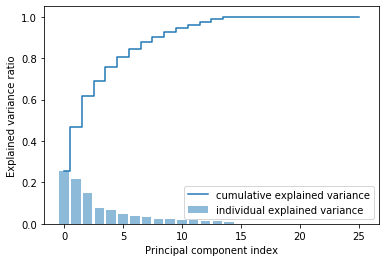

In [79]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(0,26),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(0,26),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

### Without PCA

In [80]:
##Without PCA
pca = PCA(n_components=14)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [81]:
param_grid={'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid)
knn_cv.fit(X_train_std, y_train)
print('best k')
print(format(knn_cv.best_params_))
print('Optimal accuracy score ')
print(format(knn_cv.best_score_))

E:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best k
{'n_neighbors': 1}
Optimal accuracy score 
0.7919117647058823


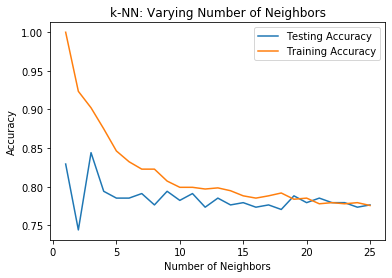

In [83]:
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    train_accuracy[i]=knn.score(X_train_std,y_train)
    test_accuracy[i]=knn.score(X_test_std,y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [76]:
##tree

param_grid={'max_depth': np.arange(1,20)}
tree=DecisionTreeClassifier()
tree_cv=GridSearchCV(tree,param_grid)
tree_cv.fit(X_train_std, y_train)
print('best depth')
print(format(tree_cv.best_params_))
print('Optimal accuracy score ')
print(format(tree_cv.best_score_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best depth
{'max_depth': 10}
Optimal accuracy score 
0.7867647058823529


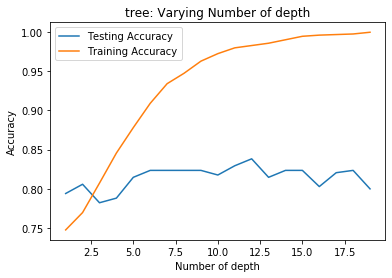

In [72]:
mx_depth = np.arange(1, 20)
train_accuracy = np.empty(len(mx_depth))
test_accuracy = np.empty(len(mx_depth))
for i,k in enumerate(mx_depth):
    tree=DecisionTreeClassifier(max_depth=k)
    tree.fit(X_train_std,y_train)
    train_accuracy[i]=tree.score(X_train_std,y_train)
    test_accuracy[i]=tree.score(X_test_std,y_test)
plt.title('tree: Varying Number of depth')
plt.plot(mx_depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(mx_depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of depth')
plt.ylabel('Accuracy')
plt.show() 

In [61]:
lgc=LogisticRegression()
param_grid={'C': (1,0.1,0.01,0.001,0.0001,10)}
lgc_cv=GridSearchCV(lgc,param_grid)
lgc_cv.fit(X_train_std,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.0001}
Optimal accuracy score 
0.7536764705882353


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

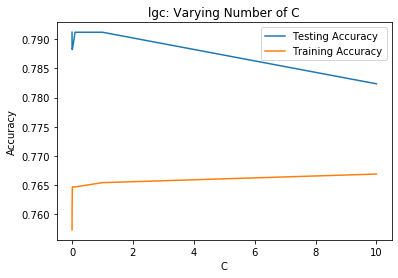

In [62]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    lgc=LogisticRegression(C=k)
    lgc.fit(X_train_std,y_train)
    train_accuracy[i]=lgc.score(X_train_std,y_train)
    test_accuracy[i]=lgc.score(X_test_std,y_test)
plt.title('lgc: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [63]:
svc = SVC(gamma='auto')
param_grid={'C': (1,0.1,0.01,0.001,0.0001,10)}
svc_cv=GridSearchCV(lgc,param_grid)
svc_cv.fit(X_train_std,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.0001}
Optimal accuracy score 
0.7536764705882353


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

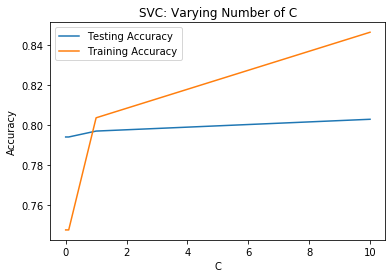

In [65]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    svc=SVC(C=k)
    svc.fit(X_train_std,y_train)
    train_accuracy[i]=svc.score(X_train_std,y_train)
    test_accuracy[i]=svc.score(X_test_std,y_test)
plt.title('SVC: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [79]:
log=LogisticRegression(C=0.0001)
tree=DecisionTreeClassifier(max_depth=10)
knn=KNeighborsClassifier(n_neighbors=1)
svc=SVC(C=0.0001)
pipe1=Pipeline([["sc", StandardScaler()],
               ['clf', log]])
pipe3=Pipeline([["sc", StandardScaler()],
               ['clf', knn]])
pipe4=Pipeline([["sc", StandardScaler()],
               ['clf', svc]])
clf_labels=["Logestic regression", "Decision tree", "KNN","SVC"]
print("10-fold cross validation:\n")
for clf, label in zip([pipe1, tree, pipe3,pipe4], clf_labels):
    scores=cross_val_score(estimator=clf,
                          X=X_train_std,
                          y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.75 (+/- 0.02) [Logestic regression]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.80 (+/- 0.03) [Decision tree]
Accuracy: 0.81 (+/- 0.03) [KNN]
Accuracy: 0.75 (+/- 0.00) [SVC]


In [80]:
log=LogisticRegression(C=0.0001)
tree=DecisionTreeClassifier(max_depth=2.5)
knn=KNeighborsClassifier(n_neighbors=1)
svc=SVC(C=0.0001)
pipe1=Pipeline([["sc", StandardScaler()],
               ['clf', log]])
pipe3=Pipeline([["sc", StandardScaler()],
               ['clf', knn]])
pipe4=Pipeline([["sc", StandardScaler()],
               ['clf', svc]])
clf_labels=["Logestic regression", "Decision tree", "KNN","SVC"]
print("10-fold cross validation:\n")
for clf, label in zip([pipe1, tree, pipe3,pipe4], clf_labels):
    scores=cross_val_score(estimator=clf,
                          X=X_train_std,
                          y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.75 (+/- 0.02) [Logestic regression]
Accuracy: 0.75 (+/- 0.02) [Decision tree]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.81 (+/- 0.03) [KNN]
Accuracy: 0.75 (+/- 0.00) [SVC]


In [81]:
eclf = EnsembleVoteClassifier(clfs=[log, tree, knn, svc], weights=[1,1,1,1])

labels = ['Logistic Regression', 'Tree', 'KNN','SVC' , 'Ensemble']
for clf, label in zip([log, tree, knn,svc, eclf], labels):

    scores = cross_val_score(clf, X_train_pca, 
                            y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.75 (+/- 0.01) [Logistic Regression]
Accuracy: 0.73 (+/- 0.02) [Tree]
Accuracy: 0.78 (+/- 0.02) [KNN]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/

Accuracy: 0.75 (+/- 0.00) [SVC]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' t

Accuracy: 0.77 (+/- 0.02) [Ensemble]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [96]:
##EnsembleVoteClassifier

In [97]:
pip --version

pip 19.1.1 from E:\anaconda\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


### With PCA

In [82]:
##Moody's score

In [83]:
##With PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [99]:
param_grid={'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid)
knn_cv.fit(X_train_pca, y_train)
print('best k')
print(format(knn_cv.best_params_))
print('Optimal accuracy score ')
print(format(knn_cv.best_score_))

E:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best k
{'n_neighbors': 1}
Optimal accuracy score 
0.7669117647058824


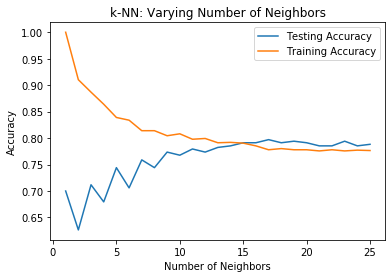

In [84]:
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    train_accuracy[i]=knn.score(X_train_pca,y_train)
    test_accuracy[i]=knn.score(X_test_pca,y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [85]:
##tree
param_grid={'max_depth': np.arange(1,20)}
tree=DecisionTreeClassifier()
tree_cv=GridSearchCV(tree,param_grid)
tree_cv.fit(X_train_pca, y_train)
print('best depth')
print(format(tree_cv.best_params_))
print('Optimal accuracy score ')
print(format(tree_cv.best_score_))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best depth
{'max_depth': 5}
Optimal accuracy score 
0.7448529411764706


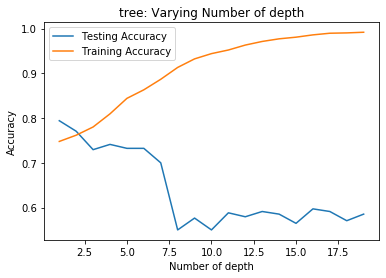

In [86]:
mx_depth = np.arange(1, 20)
train_accuracy = np.empty(len(mx_depth))
test_accuracy = np.empty(len(mx_depth))
for i,k in enumerate(mx_depth):
    tree=DecisionTreeClassifier(max_depth=k)
    tree.fit(X_train_pca,y_train)
    train_accuracy[i]=tree.score(X_train_pca,y_train)
    test_accuracy[i]=tree.score(X_test_pca,y_test)
plt.title('tree: Varying Number of depth')
plt.plot(mx_depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(mx_depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of depth')
plt.ylabel('Accuracy')
plt.show() 

In [87]:
lgc=LogisticRegression()
param_grid={'C': (1,0.1,0.01,0.001,0.0001,10)}
lgc_cv=GridSearchCV(lgc,param_grid)
lgc_cv.fit(X_train_pca,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.001}
Optimal accuracy score 
0.7522058823529412


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

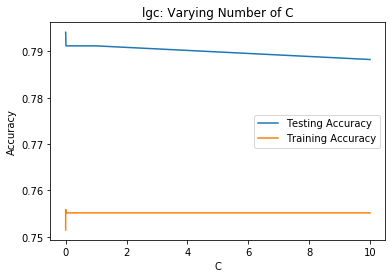

In [88]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    lgc=LogisticRegression(C=k)
    lgc.fit(X_train_pca,y_train)
    train_accuracy[i]=lgc.score(X_train_pca,y_train)
    test_accuracy[i]=lgc.score(X_test_pca,y_test)
plt.title('lgc: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [90]:
svc = SVC(gamma='auto')
param_grid={'C': (1,0.1,0.01,0.001,0.0001,10)}
svc_cv=GridSearchCV(lgc,param_grid)
svc_cv.fit(X_train_pca,y_train)
print('best C')
print(format(lgc_cv.best_params_))
print('Optimal accuracy score ')
print(format(lgc_cv.best_score_))

best C
{'C': 0.001}
Optimal accuracy score 
0.7522058823529412


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/

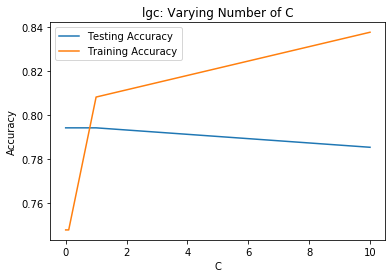

In [91]:
C = (10,1,0.1,0.01,0.001,0.0001)
train_accuracy = np.empty(len(C))
test_accuracy = np.empty(len(C))
for i,k in enumerate(C):
    svc=SVC(C=k)
    svc.fit(X_train_pca,y_train)
    train_accuracy[i]=svc.score(X_train_pca,y_train)
    test_accuracy[i]=svc.score(X_test_pca,y_test)
plt.title('lgc: Varying Number of C')
plt.plot(C, test_accuracy, label = 'Testing Accuracy')
plt.plot(C, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

In [92]:
log=LogisticRegression(C=0.001)
tree=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier(n_neighbors=1)
svc=SVC(C=0.001)
pipe1=Pipeline([["sc", StandardScaler()],
               ['clf', log]])
pipe3=Pipeline([["sc", StandardScaler()],
               ['clf', knn]])
pipe4=Pipeline([["sc", StandardScaler()],
               ['clf', svc]])
clf_labels=["Logestic regression", "Decision tree", "KNN","SVC"]
print("10-fold cross validation:\n")
for clf, label in zip([pipe1, tree, pipe3,pipe4], clf_labels):
    scores=cross_val_score(estimator=clf,
                          X=X_train_pca,
                          y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.75 (+/- 0.01) [Logestic regression]
Accuracy: 0.75 (+/- 0.04) [Decision tree]
Accuracy: 0.78 (+/- 0.02) [KNN]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.75 (+/- 0.00) [SVC]


In [93]:
eclf = EnsembleVoteClassifier(clfs=[log, tree, knn, svc], weights=[1,1,1,1])

labels = ['Logistic Regression', 'Tree', 'KNN','SVC' , 'Ensemble']
for clf, label in zip([log, tree, knn,svc, eclf], labels):

    scores = cross_val_score(clf, X_train_pca, 
                            y=y_train,
                          cv=10,
                          scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Accuracy: 0.75 (+/- 0.01) [Logistic Regression]
Accuracy: 0.75 (+/- 0.04) [Tree]
Accuracy: 0.78 (+/- 0.02) [KNN]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/

Accuracy: 0.75 (+/- 0.00) [SVC]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' t

Accuracy: 0.78 (+/- 0.02) [Ensemble]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' t